# FAKE NEWS CLASSIFICATION AND PREDICTION 
-----------------------------------------
- Team Name - TEAM_D_Data606

- Author : Sushrutha DT and Srikeerthi Upperla

------
### **Notebook Abstract -** 

This Notebook contains explonatory data analysis on the fakenews data set. 
We intend scout for the below -
- Check for datatypes
- Check for missing values and its imputation
- Find the distribution of data 
- Closer look for outliers 
- Check for corelation
- Descriptive Analysis
- Text Preprocessing

-------





## 1.0 Importing Libraries 

In [ ]:
#importing necessary libraries 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2.0 Loading Dataset

In [ ]:
#loads the submit_data from Github

submit_url = 'https://raw.githubusercontent.com/SushruthDt/TEAM_D_data606/main/Data%20Folder/submit.csv'
submit_data = pd.read_csv(submit_url)

In [ ]:
submit_data.head()

,id,label
0,20800,0
1,20801,1
2,20802,0
3,20803,1
4,20804,1


In [ ]:
#loads the test_data from Github 

test_url = 'https://raw.githubusercontent.com/SushruthDt/TEAM_D_data606/main/Data%20Folder/test.csv'
test_data = pd.read_csv(test_url)
test_data.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [ ]:
#loads the train_data from Github 

train_url = 'https://raw.githubusercontent.com/SushruthDt/TEAM_D_data606/main/Data%20Folder/train.csv'
train_data = pd.read_csv(train_url)
train_data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


-------------
## 3.0 Explonatory Data Analysis on Train Data
------------------


### 3.1 DataType Check

In [ ]:
train_data.shape  #size of the dataset

(20800, 5)

In [ ]:
train_data.info() #consise summary of train_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20800 non-null  object
 2   author  20800 non-null  object
 3   text    20800 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [ ]:
train_data.dtypes  #datatype of each column in train_data

id         int64
title     object
author    object
text      object
label      int64
dtype: object

**Observation - Datatypes of columns are as expected. No need to change data type**

### 3.2 Check for NULL Values

In [ ]:
train_data.isnull().sum() #looking for null values

id           0
title      558
author    1957
text        39
label        0
dtype: int64

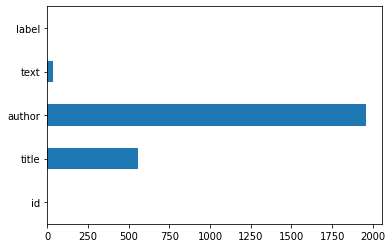

In [ ]:
train_data.isnull().sum().plot(kind='barh') #Bar graph that shows the number of Null Values

In [ ]:
# replacing the null values with empty string in the train_data dataset

train_data = train_data.fillna('')

In [ ]:
# checking the number of missing values in the train_data dataset

train_data.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

### 3.3 Checking Data Distribution

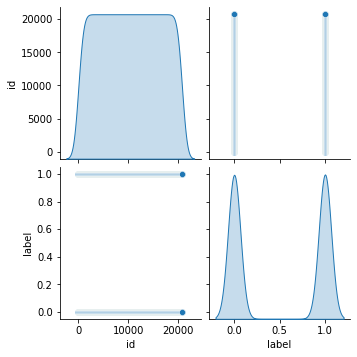

In [ ]:
sns.pairplot(train_data,diag_kind = 'kde') #relationship in  dataset

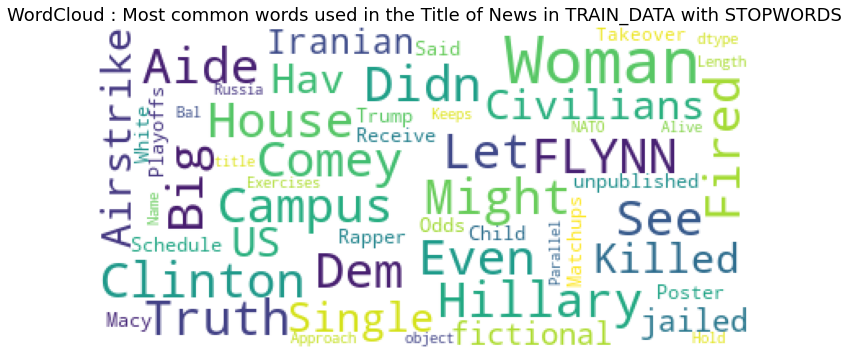

In [ ]:
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

wordcloud = WordCloud(
                          background_color='white',
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(train_data['title']))

plt.figure(figsize=(15,6))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('WordCloud : Most common words used in the Title of News in TRAIN_DATA with STOPWORDS', fontsize=18)
plt.show()

**Observation - Woman, Clinton,Hillary Civilians, Campus are few words that are more frequent in Titles of Articles**

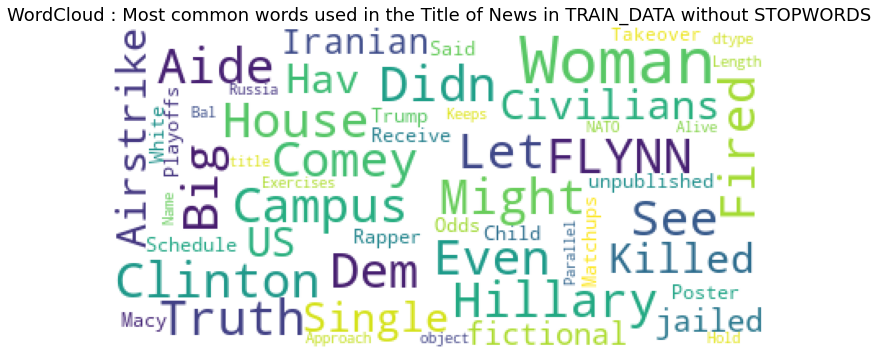

In [ ]:
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(train_data['title']))

plt.figure(figsize=(15,6))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('WordCloud : Most common words used in the Title of News in TRAIN_DATA without STOPWORDS', fontsize=18)
plt.show()

**Observation - Woman, Clinton,Hillary Civilians, Campus are few words that are more frequent in Titles of Articles**

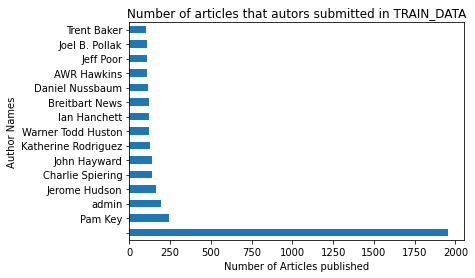

In [ ]:
train_data.groupby('author')['id'].count().sort_values(ascending=False).head(15).plot(kind='barh')
plt.ylabel('Author Names')
plt.xlabel('Number of Articles published')
plt.title('Number of articles that autors submitted in TRAIN_DATA')
plt.show()

***Observation - Panm key,admin,Jerome Hudson are authors who has published more articles ***

-------------
## 4.0 Explonatory Data Analysis on Test Data
------------------


### 4.1 DataType Check

In [ ]:
test_data.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [ ]:
test_data.dtypes

id         int64
title     object
author    object
text      object
dtype: object

### 4.2 Check for NULL Values

In [1]:
test_data.isnull().sum() #looking for null values

NameError: ignored

### 4.4 Descriptive Analysis

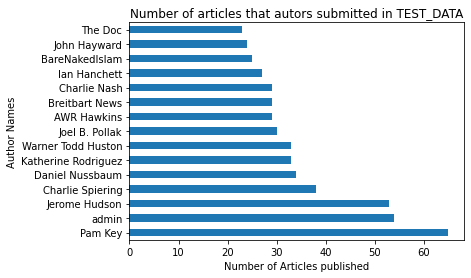

In [ ]:
test_data.groupby('author')['id'].count().sort_values(ascending=False).head(15).plot(kind='barh')
plt.ylabel('Author Names')
plt.xlabel('Number of Articles published')
plt.title('Number of articles that autors submitted in TEST_DATA')
plt.show()

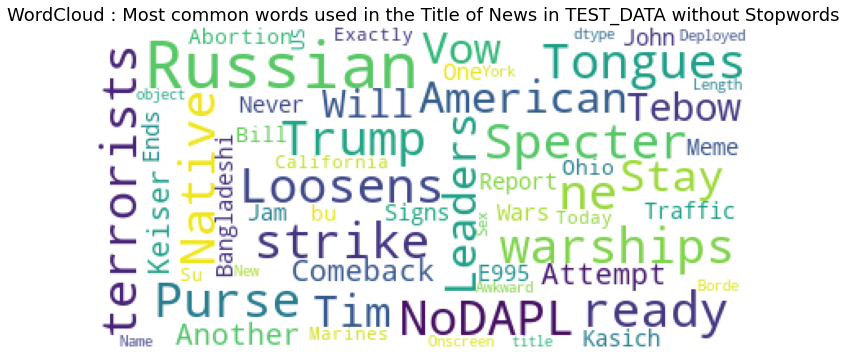

In [ ]:
#Text Pre-processing

from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(test_data['title']))

plt.figure(figsize=(15,6))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('WordCloud : Most common words used in the Title of News in TEST_DATA without Stopwords', fontsize=18)
plt.show() #Wordcloud without Stopwords

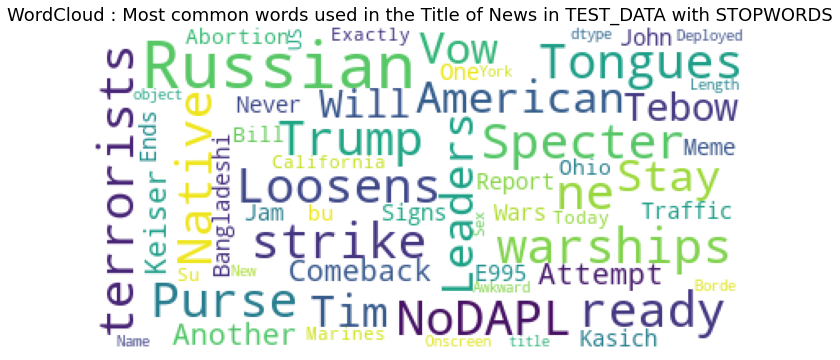

In [ ]:
wordcloud = WordCloud(
                          background_color='white',
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(test_data['title']))

plt.figure(figsize=(15,6))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('WordCloud : Most common words used in the Title of News in TEST_DATA with STOPWORDS', fontsize=18)
plt.show() #Wordcloud with Stopwords

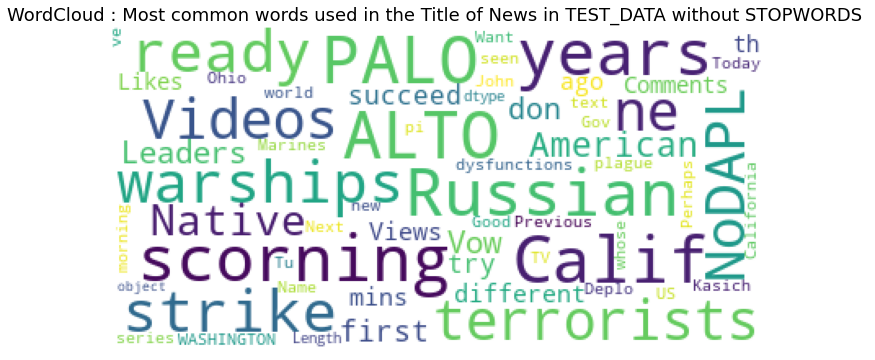

In [ ]:
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(test_data['text']))

plt.figure(figsize=(15,6))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('WordCloud : Most common words used in the Title of News in TEST_DATA without STOPWORDS ', fontsize=18)
plt.show()

-------------
## 5.0 Text Processing
------------------


In [ ]:
import numpy as np
import pandas as pd

import re
import nltk
import spacy
import string

pd.options.mode.chained_assignment = None


train_url = 'https://raw.githubusercontent.com/SushruthDt/TEAM_D_data606/main/Data%20Folder/train.csv'
train_data = pd.read_csv(train_url)

df = train_data['title']
df = df.astype(str)
df.head()

0    House Dem Aide: We Didn’t Even See Comey’s Let...
1    FLYNN: Hillary Clinton, Big Woman on Campus - ...
2                    Why the Truth Might Get You Fired
3    15 Civilians Killed In Single US Airstrike Hav...
4    Iranian woman jailed for fictional unpublished...
Name: title, dtype: object

In [ ]:
#Lower Casing

df["text_lower"] = df.str.lower()
df["text_lower"]

0        house dem aide: we didn’t even see comey’s let...
1        flynn: hillary clinton, big woman on campus - ...
2                        why the truth might get you fired
3        15 civilians killed in single us airstrike hav...
4        iranian woman jailed for fictional unpublished...
                               ...                        
20795    rapper t.i.: trump a ’poster child for white s...
20796    n.f.l. playoffs: schedule, matchups and odds -...
20797    macy’s is said to receive takeover approach by...
20798    nato, russia to hold parallel exercises in bal...
20799                            what keeps the f-35 alive
Name: title, Length: 20800, dtype: object

In [ ]:
# Imporiting NLTK and re to perform text preprocessing on train_data

from nltk.stem.porter import PorterStemmer
port_stem = PorterStemmer()
import re
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

print(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'bo

In [ ]:
#Removal of Punctuations

REMOVE_PUNCT = string.punctuation
def remove_punctuation(text):
    """Function to remove the punctuation in a text"""
    return text.translate(str.maketrans('', '', REMOVE_PUNCT))

df["text_wo_punct"] = df["text_lower"].apply(lambda text: remove_punctuation(text))
df["text_wo_punct"].head()

0    house dem aide we didn’t even see comey’s lett...
1    flynn hillary clinton big woman on campus  bre...
2                    why the truth might get you fired
3    15 civilians killed in single us airstrike hav...
4    iranian woman jailed for fictional unpublished...
Name: title, dtype: object

In [ ]:
#Tokenization

from nltk.tokenize import TweetTokenizer
tt = TweetTokenizer()
df['tokenized']=df["text_wo_punct"].apply(tt.tokenize)
df['tokenized'].head()

0    [house, dem, aide, we, didn, ’, t, even, see, ...
1    [flynn, hillary, clinton, big, woman, on, camp...
2            [why, the, truth, might, get, you, fired]
3    [15, civilians, killed, in, single, us, airstr...
4    [iranian, woman, jailed, for, fictional, unpub...
Name: title, dtype: object

In [ ]:
#Removing Stopwords

eng_stopwords = stopwords.words('english') 
df['stopwords_removed'] = df['tokenized'].apply(lambda words: [word for word in words if word not in eng_stopwords])
df['stopwords_removed'].head()

0    [house, dem, aide, ’, even, see, comey, ’, let...
1    [flynn, hillary, clinton, big, woman, campus, ...
2                           [truth, might, get, fired]
3    [15, civilians, killed, single, us, airstrike,...
4    [iranian, woman, jailed, fictional, unpublishe...
Name: title, dtype: object

In [ ]:
#Stemming

import pandas as pd
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
df['stemmed'] = df['stopwords_removed'].apply(lambda x: [stemmer.stem(y) for y in x]) 
df['stemmed'].head()

0    [hous, dem, aid, ’, even, see, comey, ’, lette...
1    [flynn, hillari, clinton, big, woman, campus, ...
2                            [truth, might, get, fire]
3    [15, civilian, kill, singl, us, airstrik, iden...
4    [iranian, woman, jail, fiction, unpublish, sto...
Name: title, dtype: object

In [ ]:
#Lemmatization 

import nltk
from nltk.stem import WordNetLemmatizer 

lemmatizer = WordNetLemmatizer()

df['lemmatized'] = df['stopwords_removed'].apply(lambda x: [lemmatizer.lemmatize(y) for y in x]) 
df['lemmatized'].head()

#Lemmatization is preferred over Stemming because lemmatization does a morphological analysis of the words.

0    [house, dem, aide, ’, even, see, comey, ’, let...
1    [flynn, hillary, clinton, big, woman, campus, ...
2                           [truth, might, get, fired]
3    [15, civilian, killed, single, u, airstrike, i...
4    [iranian, woman, jailed, fictional, unpublishe...
Name: title, dtype: object

In [ ]:
#Vectorizing 

from sklearn.feature_extraction.text import CountVectorizer

count_vectorize = CountVectorizer() 
vectorized = count_vectorize.fit_transform(df['lemmatized']) 

AttributeError: ignored

In [ ]:
# Cleaning train_data using texthero 

!pip install texthero

import texthero as hero

from texthero import preprocessing

custom_pipeline = [preprocessing.fillna,
                   #preprocessing.lowercase,
                   preprocessing.remove_whitespace,
                   preprocessing.remove_diacritics
                   #preprocessing.remove_brackets
                  ]
df['clean_text'] = hero.clean(train_data['title'], custom_pipeline)
df['clean_text'] = [n.replace('{','') for n in df['clean_text']]
df['clean_text'] = [n.replace('}','') for n in df['clean_text']]
df['clean_text'] = [n.replace('(','') for n in df['clean_text']]
df['clean_text'] = [n.replace(')','') for n in df['clean_text']]

     |████████████████████████████████| 235 kB 4.5 MB/s 
     |████████████████████████████████| 1.5 MB 53.3 MB/s 
     |████████████████████████████████| 748 kB 50.3 MB/s 
  Attempting uninstall: regex
    Found existing installation: regex 2019.12.20
    Uninstalling regex-2019.12.20:
      Successfully uninstalled regex-2019.12.20
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


ValueError: ignored